In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reward = np.load("rewards.npz.npy")
reward_nofinetune = np.load("rewards_nofinetune.npz.npy")
reward_nosrl = np.load("rewards_nosrl.npz.npy")

(0.0, 80.0)

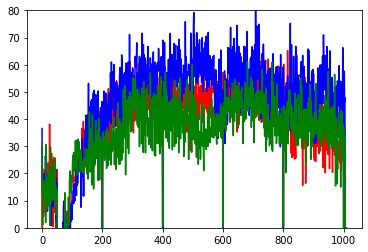

In [9]:
plt.plot(reward.mean(axis=0),'r')
plt.plot(reward_nofinetune.mean(axis=0),'b')
plt.plot(reward_nosrl.mean(axis=0),'g')
plt.ylim(0,80)

In [10]:
reward_nosrl.mean(axis=0)[-10:]

array([7.73709666e-03, 1.97761566e+01, 3.68046249e+01, 3.32291372e+01,
       3.32550774e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [11]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer  = SummaryWriter(log_dir='tb/rewards')
writer1 = SummaryWriter(log_dir='tb/rewards_nofinetune')
writer2 = SummaryWriter(log_dir='tb/rewards_nosrl')

2021-07-21 11:42:01.074081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/micrl/.mujoco/mjpro150/bin:/usr/local/cuda-10.1/lib64:/usr/local/cuda-10.0/lib64
2021-07-21 11:42:01.074104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
for i in range(1010):
    writer.add_scalar('reward',reward.mean(axis=0)[i],i)
    writer1.add_scalar('reward',reward_nofinetune.mean(axis=0)[i],i)
    writer2.add_scalar('reward',reward_nosrl.mean(axis=0)[i],i)